# Soluzione del problema del Mammino Minimo utilizzando la Programmazione Lineare

## Definizione del problema (da un nodo origine ad un nodo destinazione)

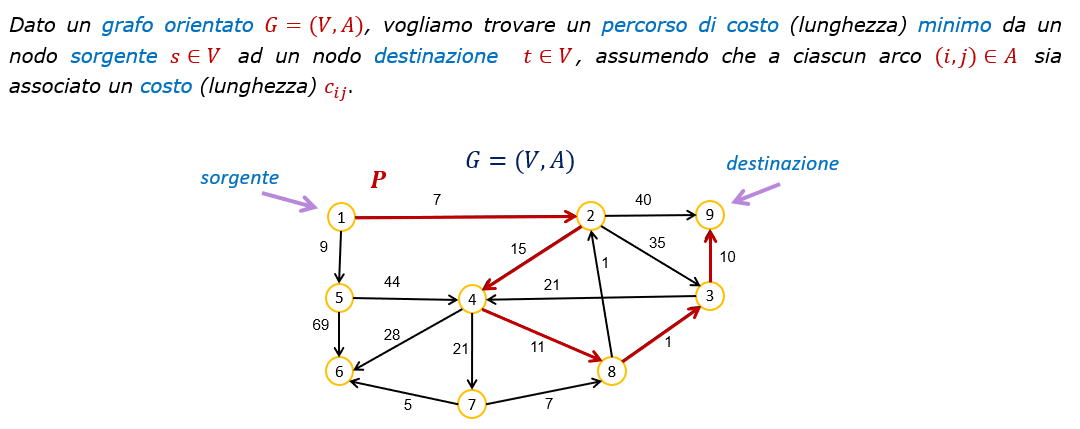

# Formulazione del problema

### $$ min \sum_{(i,j) \in A} c_{ij} x_{ij}$$
### $$ \sum_{j \in \delta^+(i)} x_{ij} - \sum_{j \in \delta^-(i)} x_{ji} =
\begin{cases}
1 \quad if \quad i = s\\
0 \quad if \quad i \neq s,t\\
-1 \quad if \quad i = t
\end{cases} $$
### $$ 0 \leq x_{ij} \leq 1 $$

dove:
- V $\rightarrow$ insieme dei nodi del grafo
- A $\rightarrow$ insieme degli archi del grafo
- $c_{ij}$ $\rightarrow$ costo associato all'arco $(i,j) \in A$
- s $\rightarrow$ nodo origine
- t $\rightarrow$ nodo destinazione



### Legge il file contenente l'elenco degli archi e crea
- Il nodo origine: **ori**
- Il nodo destinazione: **dest**
- Una lista **Nodi** contenente l'elenco dei nodi del grafo
- Un dizionario **Archi** = $\{(i,j) : \ c_{ij} \quad (i,j) \in A\}$

In [9]:
file = open("shortest_path_example.dat", "r")

row = file.readlines()          # get all graph rows

# get origin and destination
ori = int(row[0].split()[2])
dest = int(row[1].split()[2])

nodes = []
archi = {} # dict

for k in range (3, len(row)):
    i = int(row[k].split()[0]) # origin
    j = int(row[k].split()[1]) # destination
    cost = float(row[k].split()[2]) # cost
    
    if i not in nodes:
        nodes.append(i)
        
    if j not in nodes:
        nodes.append(j)
        
    archi[(i,j)] = cost

print(ori)
print(dest)
print(nodes)
print(archi)

1
9
[1, 2, 5, 3, 4, 9, 6, 7, 8]
{(1, 2): 7.0, (1, 5): 9.0, (2, 3): 35.0, (2, 4): 15.0, (2, 9): 40.0, (3, 4): 21.0, (3, 9): 10.0, (4, 6): 28.0, (4, 7): 21.0, (4, 8): 11.0, (5, 4): 44.0, (5, 6): 69.0, (7, 6): 5.0, (7, 8): 7.0, (8, 2): 1.0, (8, 3): 1.0}


### Importa la libreria GRB, inizializza il problema e definisce le variabili

In [15]:
import gurobipy as gp
from gurobipy import GRB


mod = gp.Model("my_model")
# mod.addVars(archi.keys(), vtype=GRB.CONTINUOUS, lb=0.0, ub=1.0) # here I'm just adding the vars,
# I will need to set the objective function

# Here instead I'm directly adding the coefficient that they wuould have in the f(x)
x_vars = mod.addVars(archi.keys(), vtype=GRB.CONTINUOUS, lb=0.0, ub=1.0, obj=archi, name="x")

# As default gurubi set as min objctive
mod.write("mod_write.lp") 

### Vincolo sul nodo origine

In [13]:
# direct corrispondece from our 'human' text to guroby sintax (summatory over i j of a node, of xij = 1)
origin = mod.addConstr(gp.quicksum(x_vars(ori,j) for j in nodes if (ori, j) in archi.keys() == 1))
mod.write("mod_write_after_constr.lp")

GurobiError: Invalid value for Model.addConstr

### Vincolo sul nodo destinazione

### Vincoli sui nodi intermedi

In [ ]:
nodes_middle = mod.addConstrs(
        gp.quicksum(x_vars(i,j) for j in nodes of (i,j) in archi.keys()) -
        gp.quicksum(x_vars(i,j) for j in nodes of (i,j) in archi.keys()) 
        == 0
        for i in Nodi if i != ori and i != dest
    )

### Risolve il problema

### Preleva la soluzione e la stampa

In [ ]:
if mod.Status == GRB.OPTIMAL:
    print(mod.ObjVal)
    
    print("Optimal solution archi:")
    
    for (i,j) in archi.keys():
        if x_vars(i,j).X > 0.5:
            print(i,j)

## Definizione del problema (da un nodo origine a tutti gli altri nodi)

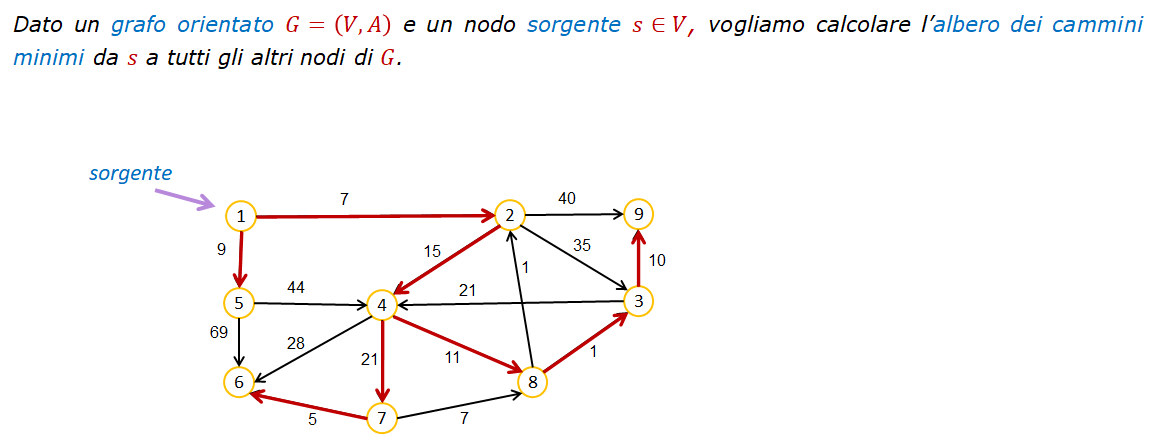

### Cambia l'upper bound di tutte le variabili

In [ ]:
# Here UB is not 1 anymore
for j in archi.keys():
   x_vars(i,j).UB = len(nodes) - 1 

TypeError: 'tupledict' object is not callable

### Elimina i vincoli e li sostituisce con i vincoli del nuovo modello

In [ ]:
mod.remove("origin")
mod.remove("destination")
mod.remove("nodes_middle")

mod.addConstr(gp.quicksum( x_vars[ori][j] for j in nodes if ([ori,j]) in archi.keys() == (len(nodes) - 1)))

mod.addConstrs(
    gp.quicksum(x_vars[ori][j] for j in nodes if ([ori,j]) in archi.keys()) -
    gp.quicksum(x_vars[ori][j] for j in nodes if ([ori,j]) in archi.keys()) 
    == - 1
    for i in nodes if i != ori
    )

GurobiError: Item to be removed not a Var, Constr, SOS, QConstr, or GenConstr

### Risolve il problema

In [ ]:
mod.optimize()

mod.setParam()

### Preleva la soluzione e la stampa

In [ ]:
if mod.Status == GRB.OPTIMAL:
    print("Optimal solution:")
    
    for (i,j) in archi.keys():
        if x_vars[(i,j)].